In [54]:
import geopandas as gp
import pandas as pd
import os
import shapely
import matplotlib as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
#Downloading file
def getct():
    '''The function downloads a shape file into the PUIDATA directory from the NYC Open data
    Author: vys217 lifting code from 
    https://github.com/fedhere/PUI2016_fb55/blob/master/HW3_fb55/citibikes_gender.ipynb
    '''
    # First I will check that required folder is already in PUIdata or not
    if not os.path.isdir(os.getenv("PUIDATA") + "/" + "nycb2010_16d"):
        
        # if in the current dir just move it to PUIData
        if os.path.isdir("nycb2010_16d"):
            print ('Folder in current directory, moving it to PUIdata')
            if os.system("mv " + "nycb2010_16d " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
                
        #otherwise start looking for the zip file
        else:
            # Check if zip file in PUIdata
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + "nycb2010_16d.zip"):
                # Check zip file in current directory
                if not os.path.isfile("nycb2010_16d.zip"):
                    # Download zip file if not in PUIdata and current directory
                    print ('Downloading')
                    os.system("curl -O https://www1.nyc.gov/assets/planning\
                    /download/zip/data-maps/open-data/nycb2010_16d.zip")
                
                #Move Zip file to PUIdata
                os.system("mv " + "nycb2010_16d.zip " + os.getenv("PUIDATA"))
                
            ### unzip the zip file, it gets unzipped to current directory 
            if not os.system("unzip " + os.getenv("PUIDATA") + "/" + "nycb2010_16d.zip"):
                print("Unzipped")
                # Move the unzipped folder to PUIData
                if os.system("mv " + "nycb2010_16d " + os.getenv("PUIDATA")):
                    print ("Error moving file!, Please check!")
                    
    ### One final check:
    if not os.path.isdir(os.getenv("PUIDATA") + "/" + "nycb2010_16d"):
        print ("WARNING!!! something is wrong: the file is not there!")
    else:
        print ("Folder with required files in PUIdata, you can continue")
getct()

Folder with required files in PUIdata, you can continue


In [24]:
#Opening census data shape file
shape_path = os.getenv('PUIDATA') +'/'+ "nycb2010_16d/nycb2010.shp"
census_data = gp.GeoDataFrame.from_file(shape_path)
census_data.to_crs(epsg=4326, inplace=True)
census_data.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438021 40.61085506708748...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910647 40.62600632456045...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511995 40.60100160658919...


In [33]:
#Extracting only Brooklyn data
brooklyn = census_data[census_data.BoroCode == '3']
brooklyn.reset_index(inplace=True)
brooklyn.head()

,index,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((-74.00659158337982 40.6556127336851,..."
1,5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384570529...
2,5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-73.99270830309769 40.6980992598468,..."
3,5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.69488514300315,..."
4,5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793357372...


In [34]:
#Location of NYU-CUSP obtained from Google
cusp = shapely.geometry.Point(-73.9866, 40.6931)

In [108]:
#Locating NYU-CUSP in brooklyn shapefile
for i in range(len(geometry)):
    if brooklyn.geometry[i].contains(cusp):
        shape = brooklyn.geometry[i]
        break

cusp_polygon = gp.GeoDataFrame(brooklyn.iloc[i,:])
print('CUSP is contained in the polygon %s'%shape)

CUSP is contained in the polygon POLYGON ((-73.98622595691906 40.69308831343839, -73.98627231669103 40.6921947946671, -73.98729894947923 40.69223407543156, -73.98725396415627 40.69312490276504, -73.98622595691906 40.69308831343839))


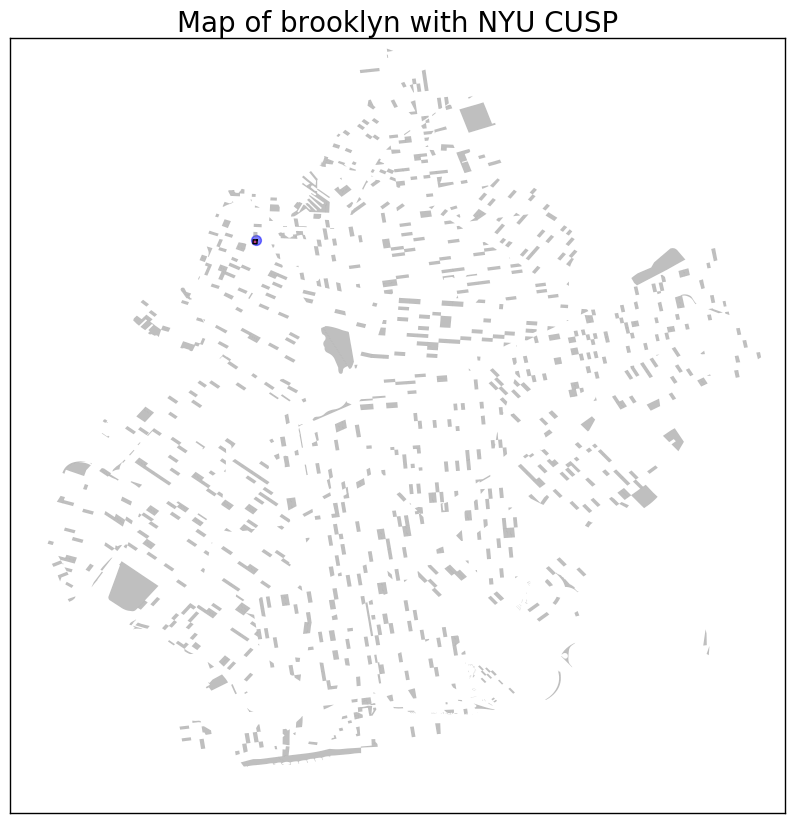

In [107]:
#Plotting data
f, ax = plt.subplots(figsize=(10,10))
brooklyn[::10].plot(ax = ax, color = 'grey', alpha = 0.5, linewidth=0.01)
cusp_polygon.T.plot(ax = ax, color = 'red')
ax.set_title("Map of brooklyn with NYU CUSP", fontsize=20)
plt.xlim(-74.05,-73.85)
plt.ylim(40.56,40.74)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.scatter(cusp.x, cusp.y, color = 'blue', s =50, alpha= 0.5)


### Figure: The points in red represents NYU-CUSP and the blue polygon represents the polygon which contains NYU-CUSP. NYU-CUSP is located in the north-west of Brooklyn.